___
# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Nombre: </Strong>  <font color="blue"> `CRISTOPHER CORONA VELASCO` </font>
- <Strong> Fecha </Strong>:   <font color="blue"> `10-10-2025` </font>
- <Strong> Correo: </Strong>  <font color="blue"> `CRISTOPHER.CORONA@ITESO.MX` </font>
___


### <font color= #2E9AFE> Tarea 2: Análisis de Regresión Lineal</font>

La tarea consiste en ajustar un modelo de regresión lineal para predecir la variable objetivo, pero no se trata solamente de ejecutar el modelo. La tarea implica varias etapas:

1. **Cargar y explorar el conjunto de datos**
- Haz una exploración inicial al conjunto de datos
- Existen valores nulos? si los hay, justifica una estrategia para tratarlos
- Según la exploración y el significado de las variables, crees que algunas variables se puedan eliminar? De ser ser así, quítalas y sigue con tu análisis (de todos modos guarda los datos originales)
- Divide tus datos en un 80% de entrenamiento y 20% de prueba antes de realizar cualquier pre-procesamiento. **De aquí en adelante recuerda lo que vimos sobre el data leakage.**

2. **Preprocesamiento de los datos**
- Crea variables dummy para las variables categóricas (revisa que estén convertidas a tipo de dato "category" primero)
- Visualiza Variables numéricas, cómo se relacionan con tu variable a predecir (con los datos del train)
- Visualiza Variables categóricas (diagrama de caja de todas las variables categóricas antes de crear los dummies) contra la variable objetivo
- Qué observas de los gráficos anteriores? hay variables que pueden ser buenos/malos predictores?
- Revisa si hay alta correlación entre las variables
- Escala las variables predictoras (sólo las variables numéricas)
- Realiza una selección de características utilizando algún método (puedes sugerir algún método como correlación, RFE, etc.).

3. **Detección de multicolinealidad**
- Calcula el VIF (Variance Inflation Factor) para detectar multicolinealidad entre las variables independientes (esto no lo vimos, pero te pido buscar la interpretación del VIF en internet). Puedes basarte en este código:
- Si detectas multicolinealidad, realiza la eliminación de variables y justifica por qué las variables eliminadas son redundantes.

4. **Entrenamiento y validación del modelo**

- Entrena el modelo utilizando regresión lineal y evalúa su rendimiento en el conjunto de entrenamiento y prueba.
- Implementa cross-validation y reporta las métricas promedio (RMSE, MAE, R²).
- Visualiza la curva de aprendizaje
- El modelo está haciendo overfittint/underfitting?
  
5. **Interpretación de los coeficientes**

*NOTA: Esto no lo vimos en clase, por lo tanto te tocará investigar cómo interpretar los coeficientes. Interpretar los coeficientes es de suma importancia para poder explicar tu modelo*

- Interpreta los coeficientes del modelo final (model.coef_) y discute cuáles son las variables más importantes para predecir la variable objetivo.
- ¿Cómo afectan los signos y magnitudes de los coeficientes a la interpretación del modelo?

6. **Mejora del modelo**

- Si el modelo presenta un mal ajuste, propón al menos formas de mejorarlo.
- Evalúa si las mejoras introducidas realmente generan un mejor desempeño del modelo.

7. **Verificación de las suposiciones del modelo**

- Revisa los residuales se distribuyen normalmente con media cero.
- Existió relación lineal entre las X y Y?
- Con tu modelo final, existe multicolinealidad en tus variables independientes?




# Renta de bicicletas

Este conjunto de datos contiene recuentos diarios de bicicletas rentadas de una empresa en Washington, D.C.

Se tienen las siguientes variables:
- Conteo de bicicletas rentadas --> target (cnt).
- Fecha (dteday)
- La temporada. Ya sea primavera, verano, otoño o invierno (season).
- Year (yr)
- Mes (mnth)
- Hora (hr)
- Indicador de si el día era festivo o no (holiday).
- Día de la semana (weekday)
- Indicador de si el día fue entre semana o fin de semana (workingday).
- La situación meteorológica ese día. 1=despejado, 2=Pocas nubes, 3=Parcialmente nublado, 4=Nublado (weathersit).
- Temperatura en grados Celsius (temp).
- Temperatura normalizada en Celsius. Los valores estan calculaods como (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (atemp)
- Humedad relativa en porcentaje (hum).
- Velocidad del viento en km por hora (windspeed).


# Paso 1: Cargar y explorar el conjunto de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from scipy import sparse
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)


bike_sharing = fetch_ucirepo(id=275)

X_raw = bike_sharing.data.features   # caractersticas
y_raw = bike_sharing.data.targets    # target

df = pd.concat([X_raw, y_raw], axis=1)
df.head()




,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
# exploración
print("Shape:", df.shape)
print("\nTipos:\n", df.dtypes)
print("\nNulos por columna:\n", df.isna().sum())


df.describe().T.head(15)

Shape: (17379, 14)

Tipos:
 dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Nulos por columna:
 dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [5]:
# Paso 1.1: Split 80/20

# separamos X, y Y dividir en Train/Test
target = 'cnt'
assert target in df.columns, f"La columna objetivo '{target}' no existe. Revisa df.columns"


X = df.drop(columns=[target])
y = df[target]

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number', 'bool']).columns.tolist()

print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)


Categóricas: ['dteday']
Numéricas: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


In [ ]:
# split 80-20

target = "cnt"

# Copias limpias
y = df[target].copy()
X = df.drop(columns=[target]).copy()

# Fecha a datetime 
X["dteday"] = pd.to_datetime(X["dteday"])
X = X.drop(columns=["dteday"])  # hay que evitar usar fecha cruda

# defición de tipos
cat_cols = ["season","yr","mnth","hr","holiday","weekday","workingday","weathersit"]
num_cols = ["temp","atemp","hum","windspeed"]

# Split ANTES de cualquier transformación y asi evitamos leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Aseguro dtypes categóricos
for c in cat_cols:
    X_train[c] = X_train[c].astype("category")
    X_test[c]  = X_test[c].astype("category")

print(X_train.shape, X_test.shape)

print("nulos del train:\n", X_train.isna().sum())
print("\ndescripción numéricas (train):\n", X_train[num_cols].describe().T)



(13903, 12) (3476, 12)
nulos del train:
 season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

descripción numéricas (train):
              count      mean       std   min     25%     50%     75%     max
temp       13903.0  0.497396  0.193017  0.02  0.3400  0.5000  0.6600  1.0000
atemp      13903.0  0.476183  0.172308  0.00  0.3333  0.4848  0.6212  1.0000
hum        13903.0  0.627011  0.192801  0.00  0.4700  0.6300  0.7800  1.0000
windspeed  13903.0  0.189822  0.122293  0.00  0.1045  0.1642  0.2537  0.8507


## 2: Visualización y preprocesamiento

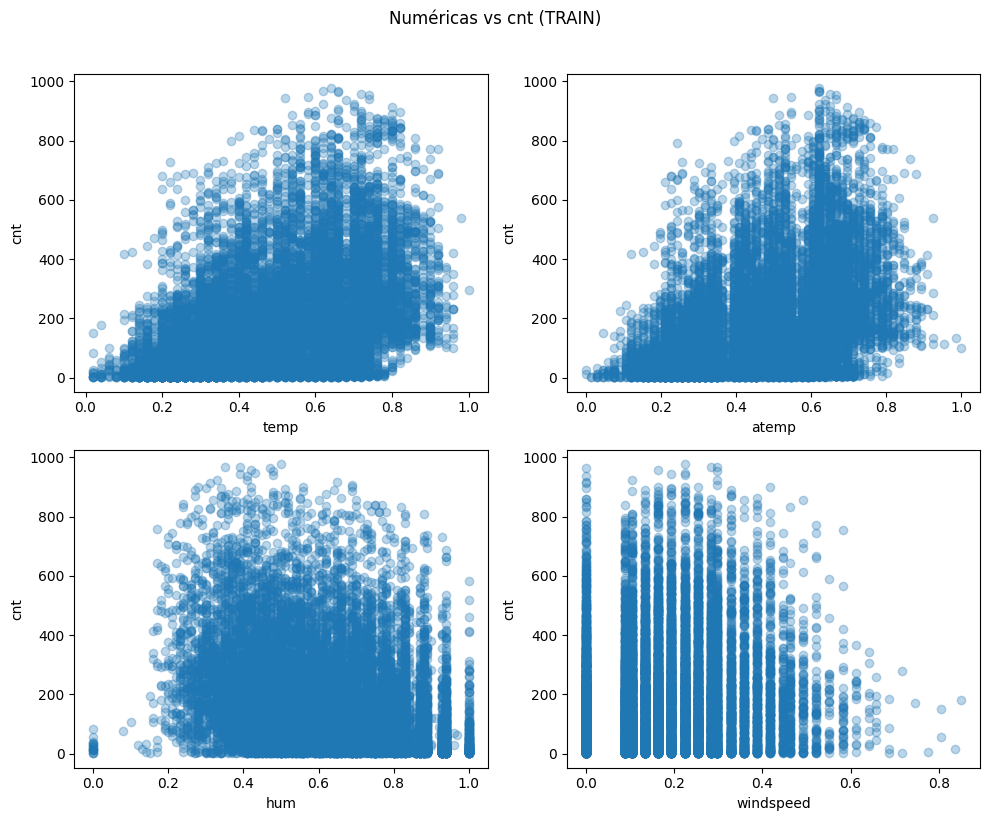

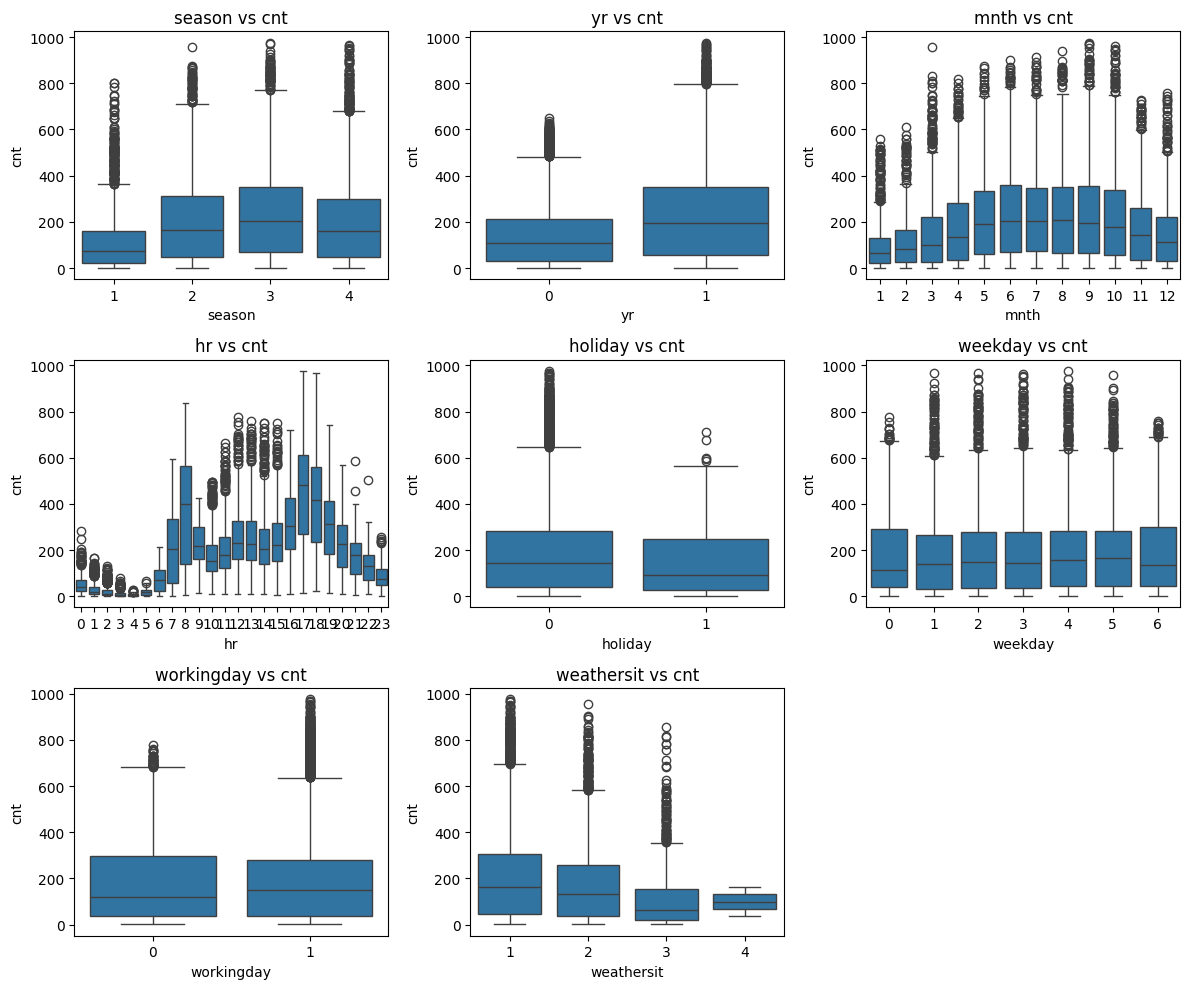

In [ ]:
## Gráficas solo con train

# relacion variables numéricas vs target (scatter simple)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, col in zip(axes.ravel(), num_cols):
    ax.scatter(X_train[col], y_train, alpha=0.3)
    ax.set_xlabel(col); ax.set_ylabel(target)
fig.suptitle("Numéricas vs cnt (TRAIN)", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots para categóricas vs target
plt.figure(figsize=(12, 10))
for i, c in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X_train[c], y=y_train)
    plt.title(f"{c} vs cnt")
    plt.xlabel(c); plt.ylabel(target)
plt.tight_layout()
plt.show()

cnt          1.000000
temp         0.403476
atemp        0.399118
windspeed    0.088802
hum         -0.324475
Name: cnt, dtype: float64

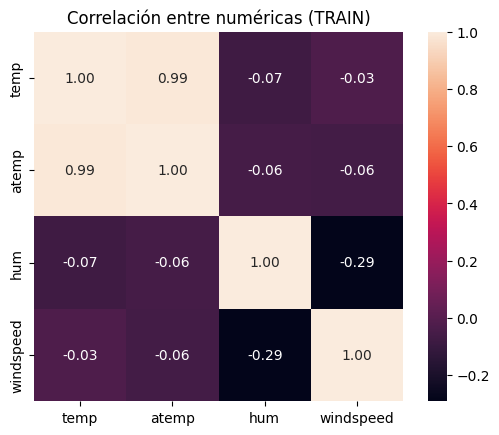

In [ ]:
## Correlaciones rápidas nuericas en train

corr_train = X_train[num_cols].assign(cnt=y_train).corr()
display(corr_train["cnt"].sort_values(ascending=False))
sns.heatmap(X_train[num_cols].corr(), annot=True, fmt=".2f", square=True)
plt.title("Correlación entre numéricas (TRAIN)")
plt.show()


In [ ]:
## Preprocesamiento: imputación, escalado y dumies

numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols)
    ],
    remainder="drop"
)

## Selección de caract. simple

from sklearn.feature_selection import SelectKBest, f_regression
from scipy import sparse
import numpy as np

# Ajusto el preprocesamiento SOLO con TRAIN y transformo
Xtr_mat = preprocess.fit_transform(X_train, y_train)

# Feature names tras OneHot
ohe = preprocess.named_transformers_["cat"]["onehot"]
cat_names = list(ohe.get_feature_names_out(cat_cols))
feat_names = np.array(num_cols + cat_names)

# Selecciono top-k
k = min(20, Xtr_mat.shape[1])
selector = SelectKBest(score_func=f_regression, k=k)
Xtr_sel = selector.fit_transform(Xtr_mat, y_train)

selected_mask = selector.get_support()
selected_features = feat_names[selected_mask]
print("Seleccionadas:", selected_features[:10], "... total:", selected_features.size)


Seleccionadas: ['temp' 'atemp' 'hum' 'windspeed' 'season_3' 'yr_1' 'mnth_2' 'hr_1' 'hr_2'
 'hr_3'] ... total: 20


## 3. Detección de multicolinealidad

In [10]:
# 3.1 VIF sobre el diseño transformado (usando las features seleccionadas arriba)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(Xmat, names):
    Xdense = Xmat.toarray() if sparse.issparse(Xmat) else Xmat
    vif_vals = [variance_inflation_factor(Xdense, i) for i in range(Xdense.shape[1])]
    out = pd.DataFrame({"feature": names, "VIF": vif_vals}).sort_values("VIF", ascending=False)
    return out

vif_all = compute_vif(Xtr_mat, feat_names)
display(vif_all.head(10))


,feature,VIF
43,weekday_1,inf
42,holiday_1,inf
44,weekday_2,inf
49,workingday_1,inf
45,weekday_3,inf
46,weekday_4,inf
47,weekday_5,inf
0,temp,50.849435
1,atemp,45.117395
5,season_3,14.339050


In [ ]:
# 3.2 Reducimos numéricas ppara reducir la multicolineadlidad
num_cols_redux = ["temp","hum","windspeed"] 

numeric_tf2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_tf2 = categorical_tf  # igual

preprocess2 = ColumnTransformer(
    transformers=[
        ("num", numeric_tf2, num_cols_redux),
        ("cat", categorical_tf2, cat_cols)
    ],
    remainder="drop"
)

# Recalculo VIF con el nuevo diseño
Xtr2 = preprocess2.fit_transform(X_train, y_train)
ohe2 = preprocess2.named_transformers_["cat"]["onehot"]
feat_names2 = np.array(num_cols_redux + list(ohe2.get_feature_names_out(cat_cols)))

vif_redux = compute_vif(Xtr2, feat_names2)
display(vif_redux.head(10))


,feature,VIF
42,weekday_1,inf
44,weekday_3,inf
48,workingday_1,inf
45,weekday_4,inf
46,weekday_5,inf
43,weekday_2,inf
41,holiday_1,inf
4,season_3,14.339048
3,season_2,9.836597
5,season_4,9.825225


## 4. Entrenamiento y validación de modelo

In [ ]:
# Modelo base: regresión Lineal con el preprocess2 sin usar 'atemp'
model = Pipeline(steps=[
    ("prep", preprocess2),
    ("lin", LinearRegression())
])

# entrenamos
model.fit(X_train, y_train)

# metricas en TRAIN y TEST
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

yhat_tr = model.predict(X_train)
yhat_te = model.predict(X_test)

def eval_reg(y_true, y_pred):
    # compatibilidad con versiones antiguas y nuevas de sklearn
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)  
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))        
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse_tr, mae_tr, r2_tr = eval_reg(y_train, yhat_tr)
rmse_te, mae_te, r2_te = eval_reg(y_test,  yhat_te)

print(f"TRAIN  -> RMSE: {rmse_tr:.3f} | MAE: {mae_tr:.3f} | R2: {r2_tr:.3f}")
print(f"TEST   -> RMSE: {rmse_te:.3f} | MAE: {mae_te:.3f} | R2: {r2_te:.3f}")


TRAIN  -> RMSE: 101.967 | MAE: 75.556 | R2: 0.687
TEST   -> RMSE: 100.502 | MAE: 74.095 | R2: 0.681


In [13]:
## cross-validation con 5 folds en train

cv = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_cv = -cross_val_score(model, X_train, y_train,
                           scoring="neg_root_mean_squared_error", cv=cv)
mae_cv  = -cross_val_score(model, X_train, y_train,
                           scoring="neg_mean_absolute_error", cv=cv)
r2_cv   =  cross_val_score(model, X_train, y_train,
                           scoring="r2", cv=cv)

print(f"CV RMSE: {rmse_cv.mean():.3f} ± {rmse_cv.std():.3f}")
print(f"CV  MAE: {mae_cv.mean():.3f} ± {mae_cv.std():.3f}")
print(f"CV   R2: {r2_cv.mean():.3f} ± {r2_cv.std():.3f}")


CV RMSE: 102.425 ± 2.323
CV  MAE: 75.887 ± 1.919
CV   R2: 0.683 ± 0.014


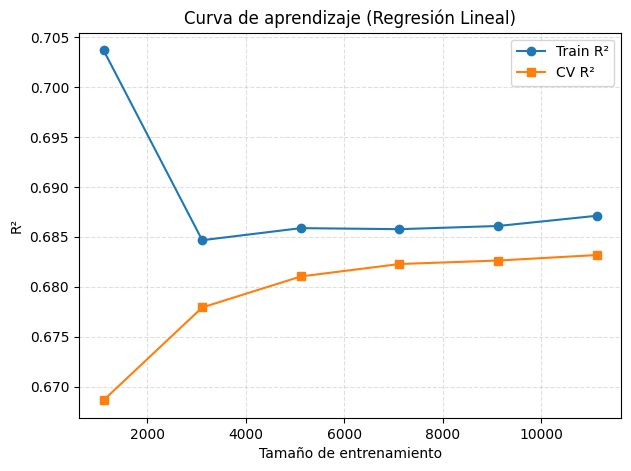

Gap R² final (Train - CV): 0.004


In [ ]:
## curva de aprensizaje con r^2

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 6), shuffle=True, random_state=None
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, marker="o", label="Train R²")
plt.plot(train_sizes, val_mean,   marker="s", label="CV R²")
plt.xlabel("Tamaño de entrenamiento"); plt.ylabel("R²")
plt.title("Curva de aprendizaje (Regresión Lineal)")
plt.legend(); plt.grid(True, ls="--", alpha=0.4)
plt.show()

print(f"Gap R² final (Train - CV): {train_mean[-1]-val_mean[-1]:.3f}")


In [ ]:
# baseline ingenuo para predecir siempre la media de y_train
ybar_test = np.full_like(y_test, y_train.mean(), dtype=float)
rmse_b, mae_b, r2_b = eval_reg(y_test, ybar_test)
print(f"Baseline -> RMSE: {rmse_b:.3f} | MAE: {mae_b:.3f} | R2: {r2_b:.3f}")

Baseline -> RMSE: 178.035 | MAE: 140.080 | R2: -0.001


## 5. Interpretación de coeficientes


In [16]:
lin = model.named_steps["lin"]
ohe = model.named_steps["prep"].named_transformers_["cat"]["onehot"]

feat_names_final = np.array(num_cols_redux + list(ohe.get_feature_names_out(cat_cols)))
coefs = pd.Series(lin.coef_, index=feat_names_final).sort_values(key=np.abs, ascending=False)

display(coefs.head(15))  # las más influyentes (en valor absoluto)


hr_17           382.468450
hr_18           342.514052
hr_8            316.385551
hr_19           236.089992
hr_16           225.671232
hr_12           176.589490
hr_13           172.059283
hr_7            172.041400
hr_9            164.487806
hr_15           159.997310
hr_20           159.968073
hr_14           150.939037
hr_11           133.964832
weathersit_4   -128.673002
hr_10           111.190145
dtype: float64

Interpretación:

* Las horas del día son lo que más pesa al final. Comparado a la hora base (la que se elimina al hacer dummies, normalmente 0), las 17:00, 18:00 y 8:00 suben mucho el conteo. También destacan las 16:00–20:00 y el bloque 7:00–9:00. 
* El clima muy malo baja fuerte el uso. La categoría de clima severo reduce bastante el número de bicis comparado con el clima “normal”.
* Sobre los signos: positivo significa que aumenta el conteo, negativo que lo reduce.
* Sobre las magnitudes: mientras más grande el valor absoluto, mayor impacto. En dummies (0/1) el coeficiente es un cambio directo frente a la categoría base. Las variables numéricas están escaladas y, ya controlando por hora y clima, tienen menos efecto relativo en este modelo.

Conclusión: el patrón horario domina a la predicción (hay picos obvios en 7–9 y 16–20 h) y el clima muy drastico la frena. El resto de variables ayuda, pero mucho menos que “a qué hora es” y “cómo está el clima”.


## 6. Mejora del modelo

In [26]:
from sklearn.linear_model import Ridge, Lasso

ridge = Pipeline([("prep", preprocess2), ("ridge", Ridge(alpha=5.0, random_state=42))])
ridge.fit(X_train, y_train)
print("Ridge TEST R²:", r2_score(y_test, ridge.predict(X_test)))

lasso = Pipeline([("prep", preprocess2), ("lasso", Lasso(alpha=0.005, random_state=42, max_iter=10000))])
lasso.fit(X_train, y_train)
print("Lasso TEST R²:", r2_score(y_test, lasso.predict(X_test)))


Ridge TEST R²: 0.6810206771104361
Lasso TEST R²: 0.6811786130896178


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# ridge con grid amplio en log espacio
ridge_pipe = Pipeline([("prep", preprocess2), ("ridge", Ridge(random_state=42))])
param_grid_ridge = {"ridge__alpha": np.logspace(-3, 3, 25)}
gcv_ridge = GridSearchCV(ridge_pipe, param_grid_ridge, scoring="r2", cv=cv, n_jobs=-1)
gcv_ridge.fit(X_train, y_train)
print("Ridge best α:", gcv_ridge.best_params_, "| CV R²:", gcv_ridge.best_score_)
print("Ridge TEST R²:", r2_score(y_test, gcv_ridge.predict(X_test)))

# lasso
lasso_pipe = Pipeline([("prep", preprocess2), ("lasso", Lasso(max_iter=10000, random_state=42))])
param_grid_lasso = {"lasso__alpha": np.logspace(-4, 1, 30)}
gcv_lasso = GridSearchCV(lasso_pipe, param_grid_lasso, scoring="r2", cv=cv, n_jobs=-1)
gcv_lasso.fit(X_train, y_train)
print("Lasso best α:", gcv_lasso.best_params_, "| CV R²:", gcv_lasso.best_score_)
print("Lasso TEST R²:", r2_score(y_test, gcv_lasso.predict(X_test)))

# cuantas features deja lasso?

best_lasso = gcv_lasso.best_estimator_
lin = best_lasso.named_steps["lasso"]
prep = best_lasso.named_steps["prep"]
ohe = prep.named_transformers_["cat"]["onehot"]
feat_names_final = np.array(["temp","hum","windspeed"] + list(ohe.get_feature_names_out(cat_cols)))
coefs = pd.Series(lin.coef_, index=feat_names_final)
print("No. coef != 0:", (coefs!=0).sum(), "de", coefs.size)
print(coefs.sort_values(key=np.abs, ascending=False).head(10))


Ridge best α: {'ridge__alpha': np.float64(0.1778279410038923)} | CV R²: 0.6831737454737381
Ridge TEST R²: 0.6810759490686518
Lasso best α: {'lasso__alpha': np.float64(0.001082636733874054)} | CV R²: 0.6831737541573263
Lasso TEST R²: 0.6810564235163801
No. coef != 0: 51 de 52
hr_17    382.040457
hr_18    342.082064
hr_8     316.023441
hr_19    235.683473
hr_16    225.225248
hr_12    176.171608
hr_7     171.689167
hr_13    171.632378
hr_9     164.110620
hr_20    159.572524
dtype: float64


## 6.1 Modelo definitivo

TRAIN -> RMSE: 101.968 | MAE: 75.554 | R²: 0.687
TEST  -> RMSE: 100.493 | MAE: 74.089 | R²: 0.681
CV RMSE: 102.425 ± 2.324
CV  MAE: 75.884 ± 1.919
CV   R²: 0.683 ± 0.014

Top 15 coef (|valor|):
hr_17           381.366134
hr_18           341.367152
hr_8            315.347143
hr_19           235.030100
hr_16           224.553604
hr_12           175.533744
hr_7            171.124562
hr_13           170.952447
hr_9            163.486028
hr_15           158.941001
hr_20           158.940478
hr_14           149.887612
hr_11           132.952734
weathersit_4   -117.888855
hr_10           110.195838
dtype: float64

Media de residuales (TEST): -4.268246935176971


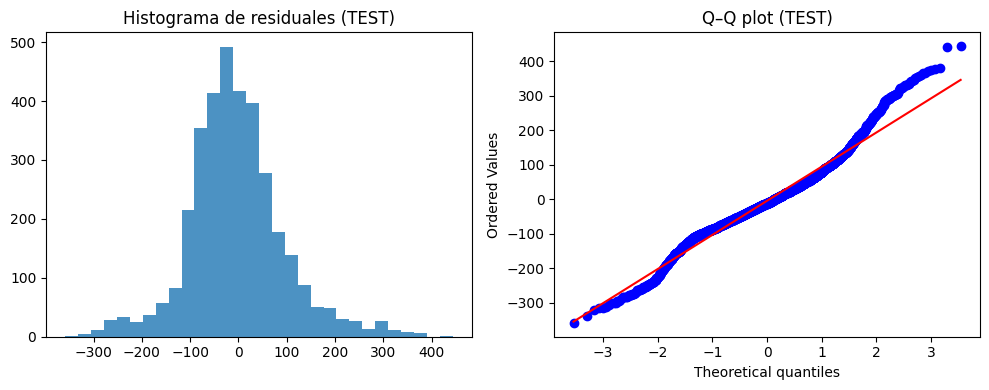

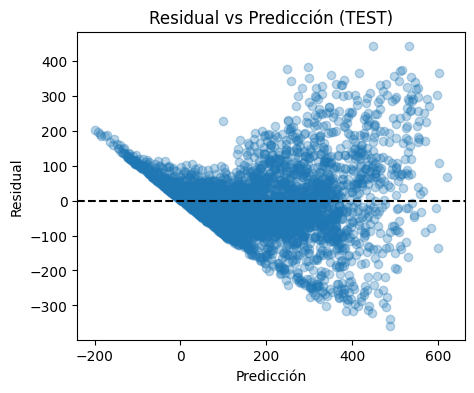


Top 10 VIF (diseño final):
         feature        VIF
42     weekday_1        inf
44     weekday_3        inf
48  workingday_1        inf
45     weekday_4        inf
46     weekday_5        inf
43     weekday_2        inf
41     holiday_1        inf
4       season_3  14.339131
3       season_2   9.836601
5       season_4   9.825244


In [ ]:
# # MODELO FINAL, ridge con mi mejor alpha
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import sparse

best_alpha = float(0.1778279410038923)  # el que nos dio GridSearch

final_model = Pipeline(steps=[
    ("prep", preprocess2),
    ("ridge", Ridge(alpha=best_alpha, random_state=42))
])

final_model.fit(X_train, y_train)

# metricas manuales por que no logro usar squared
def metrics_manual(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    resid = y_true - y_pred
    rmse = float(np.sqrt(np.mean(resid ** 2)))  
    mae  = float(np.mean(np.abs(resid)))
    sse  = float(np.sum(resid ** 2))
    sst  = float(np.sum((y_true - y_true.mean()) ** 2))
    r2   = float(1.0 - sse / sst)
    return rmse, mae, r2

yhat_tr = final_model.predict(X_train)
yhat_te = final_model.predict(X_test)
rmse_tr, mae_tr, r2_tr = metrics_manual(y_train, yhat_tr)
rmse_te, mae_te, r2_te = metrics_manual(y_test,  yhat_te)

print(f"TRAIN -> RMSE: {rmse_tr:.3f} | MAE: {mae_tr:.3f} | R²: {r2_tr:.3f}")
print(f"TEST  -> RMSE: {rmse_te:.3f} | MAE: {mae_te:.3f} | R²: {r2_te:.3f}")

# cv manual con 5 fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list, mae_list, r2_list = [], [], []

for tr_idx, va_idx in cv.split(X_train):
    Xtr, Xva = X_train.iloc[tr_idx], X_train.iloc[va_idx]
    ytr, yva = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    m = Pipeline(steps=[
        ("prep", preprocess2),
        ("ridge", Ridge(alpha=best_alpha, random_state=42))
    ])
    m.fit(Xtr, ytr)
    pred = m.predict(Xva)
    rmse, mae, r2 = metrics_manual(yva, pred)
    rmse_list.append(rmse); mae_list.append(mae); r2_list.append(r2)

print(f"CV RMSE: {np.mean(rmse_list):.3f} ± {np.std(rmse_list):.3f}")
print(f"CV  MAE: {np.mean(mae_list):.3f} ± {np.std(mae_list):.3f}")
print(f"CV   R²: {np.mean(r2_list):.3f} ± {np.std(r2_list):.3f}")

# coeficientes por importancia
prep = final_model.named_steps["prep"]
ohe  = prep.named_transformers_["cat"]["onehot"]
feat_names_final = np.array(["temp","hum","windspeed"] + list(ohe.get_feature_names_out(cat_cols)))
coefs = pd.Series(final_model.named_steps["ridge"].coef_, index=feat_names_final)\
         .sort_values(key=np.abs, ascending=False)
print("\nTop 15 coef (|valor|):")
print(coefs.head(15))

# residuales
resid = y_test - yhat_te
print("\nMedia de residuales (TEST):", float(np.mean(resid)))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(resid, bins=30, alpha=0.8)
plt.title("Histograma de residuales (TEST)")
plt.subplot(1,2,2)
st.probplot(resid, dist="norm", plot=plt)
plt.title("Q–Q plot (TEST)")
plt.tight_layout(); plt.show()

plt.figure(figsize=(5,4))
plt.scatter(yhat_te, resid, alpha=0.3)
plt.axhline(0, color="k", ls="--")
plt.xlabel("Predicción"); plt.ylabel("Residual")
plt.title("Residual vs Predicción (TEST)")
plt.show()

# VIF final para documentar la clinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(Xmat, names):
    Xdense = Xmat.toarray() if sparse.issparse(Xmat) else np.asarray(Xmat)
    vifs = [variance_inflation_factor(Xdense, i) for i in range(Xdense.shape[1])]
    return pd.DataFrame({"feature": names, "VIF": vifs})

Xtr_design = prep.transform(X_train)
vif_final = compute_vif(Xtr_design, feat_names_final).sort_values("VIF", ascending=False)
print("\nTop 10 VIF (diseño final):")
print(vif_final.head(10))


## Conclusión

El modelo sí funcionó. Con R2=0.681 en test explica 68% de la variación. El error típico es RMSE=100 y el promedio absoluto de error MAE=74. Las métricas de train, test y CV (R²=0.683±0.014) son muy parecidas, así que no hay sobreajuste y el modelo generaliza bien.

Cómo llegamos: primero hicimos el split 80/20 para evitar fugas. Quitamos dteday (fecha cruda) y atemp (casi duplicada de temp). El preprocesamiento fue imputación, escalado solo a numéricas y one-hot en categóricas con drop='first'. Probamos OLS y regularización; como daban igual, nos quedamos con Ridge (α≈0.178) por estabilidad de coeficientes.

Residuales: la media es 0, la forma es más o menos normal con colas pesadas y aparece un “abanico” (heterocedasticidad) cuando sube la predicción. Traducción: cuando hay muchas bicis el error se abre. Para afinar, conviene probar log1p(cnt) o pesos (WLS).

VIF: salieron infinitos en weekday/holiday/workingday por dependencia exacta entre ellas. Con eliminar workingday (o en su defecto weekday) se corrige. Los VIF de season rondan 10–14, algo de colinealidad esperable en dummies; Ridge ayuda a estabilizar.

Qué variables pesan más: las horas del día dominan (picos en 7–9 h y sobre todo 16–20 h). El clima severo baja fuerte el conteo. En numéricas, temp suele ayudar (positivo) y hum/windspeed restan (negativos), pero su impacto es menor frente al patrón horario.

¿Over/underfitting? No hay overfitting. Lo que falta captar son no linealidades y la varianza no constante que vemos en los residuales.

Recomendaciones cortas:

* Quitar workingday para arreglar VIF y reentrenar Ridge.
* Probar objetivo logarítmico (log1p) para cerrar el “abanico”.
* Codificar hr de forma cíclica (sin/cos) para reducir dummies y respetar la continuidad 23 a 0.
* Si nada mejora mucho, dejar Ridge como modelo final: es más estable, interpretable y cumple bien.
